In [237]:
# Import all libraries needed

import pandas as pd
import hvplot.pandas
from pathlib import Path
import csv
import plotly.express as px


%matplotlib inline

In [238]:
#Importing csv data

Stolen_Funds_df = pd.read_csv(Path('/Users/CHD/desktop/Project-1/Resources/Stolen_Funds.csv'))

Stolen_Funds_df.rename(columns={'Hacker ID': 'hackerid'},inplace=True)


display(Stolen_Funds_df.head())

display(Stolen_Funds_df.tail())


,Date,Lost Funds,Location,Type,Enitty,hackerid,Method
0,1/5/2017,"1,800,000",United States,Traditional,National Bank of Blacksburg,Unknown,Phishing
1,2/1/2017,"7,000,000",South Korea,Cryptocurrency,BitHumb,North Korea,Insider
2,4/22/2017,"5,600,000",South Korea,Cryptocurrency,YouBit,North Korea,External Hack
3,6/29/2017,"7,000,000",South Korea,Cryptocurrency,BitHumb,North Korea,Phishing
4,9/23/2017,"2,190,000",South Korea,Cryptocurrency,Coinis,North Korea,Phishing


,Date,Lost Funds,Location,Type,Enitty,hackerid,Method
54,2/2/2022,"322,000,000",On-Chain,Cryptocurrency,Wormhole,Unknown,External Hack
55,2/8/2022,"36,000,000",United States,Cryptocurrency,IRA Financial Trust,Unknown,External Hack
56,3/23/2022,"615,000,000",On-Chain,Cryptocurrency,Ronin,North Korea,External Hack
57,4/18/2022,"180,000,000",On-Chain,Cryptocurrency,Beanstalk Farms,Unknown,External Hack
58,11/12/2022,"477,000,000",Bahamas,Cryptocurrency,FTX,Unknown,External Hack


In [239]:
#Changing Lost Funds from an object to a float

Stolen_Funds_df['Lost Funds'] = Stolen_Funds_df['Lost Funds'].str.replace(',','').astype(float)
print(Stolen_Funds_df.dtypes)

Date           object
Lost Funds    float64
Location       object
Type           object
Enitty         object
hackerid       object
Method         object
dtype: object


In [240]:
total_lost = float(Stolen_Funds_df['Lost Funds'].sum())

print(total_lost)

4372010923.82


In [241]:
# Separate types traditional vs cryptocurrency

Grouped = Stolen_Funds_df.groupby('Type')

Traditional_df = Grouped.get_group('Traditional')

Traditional_df.set_index('Type', inplace=True)

Traditional_df

#ppp

,Date,Lost Funds,Location,Enitty,hackerid,Method
Type,,,,,,
Traditional,1/5/2017,1.800000e+06,United States,National Bank of Blacksburg,Unknown,Phishing
Traditional,10/1/2017,1.400000e+07,Taiwan,Far Eastern International Bank,North Korea,MalWare
Traditional,1/17/2018,2.370250e+05,Kenya,National Bank of Kenya,Nonstate actor,MalWare
Traditional,2/7/2018,5.000000e+08,Netherlands,Banking sector,Nonstate actor,Phishing
Traditional,2/18/2018,1.000000e+06,India,City Union Bank,North Korea,External Hack
Traditional,3/18/2018,1.250000e+05,United States,ATMs,Nonstate actor,MalWare
Traditional,5/12/2018,1.500000e+07,Mexico,Banco de Mexico,Unknown,External Hack
Traditional,5/24/2018,1.000000e+07,Chile,Banco de Chile,North Korea,MalWare
Traditional,7/3/2018,1.000000e+06,Russia,Automated Workstation Client,Nonstate actor,MalWare


In [242]:
print(Traditional_df.dtypes)

Date           object
Lost Funds    float64
Location       object
Enitty         object
hackerid       object
Method         object
dtype: object


In [243]:
Traditional_Lost_sum = Traditional_df['Lost Funds'].sum()

Traditional_Lost_sum

719496223.8199999

In [244]:
Cryptocurrency_df = Grouped.get_group('Cryptocurrency')

Cryptocurrency_df.set_index('Type', inplace=True)

Cryptocurrency_df



,Date,Lost Funds,Location,Enitty,hackerid,Method
Type,,,,,,
Cryptocurrency,2/1/2017,7000000.0,South Korea,BitHumb,North Korea,Insider
Cryptocurrency,4/22/2017,5600000.0,South Korea,YouBit,North Korea,External Hack
Cryptocurrency,6/29/2017,7000000.0,South Korea,BitHumb,North Korea,Phishing
Cryptocurrency,9/23/2017,2190000.0,South Korea,Coinis,North Korea,Phishing
Cryptocurrency,12/19/2017,76711200.0,South Korea,YouBit,North Korea,External Hack
Cryptocurrency,12/6/2017,70000000.0,Slovenian,NiceHash,North Korea,MalWare
Cryptocurrency,1/26/2018,534000000.0,Japan,Coincheck,North Korea,External Hack
Cryptocurrency,2/9/2018,170000000.0,Italy,BitGrail,Unknown,Internal Hack
Cryptocurrency,6/10/2018,37000000.0,South Korea,Coinrail,Unknown,External Hack


In [245]:
print(Cryptocurrency_df.dtypes)

Date           object
Lost Funds    float64
Location       object
Enitty         object
hackerid       object
Method         object
dtype: object


In [246]:
Crypto_Lost_sum = Cryptocurrency_df['Lost Funds'].sum()

Crypto_Lost_sum

3652514700.0

In [247]:
Total_data = {
    'Sector' : ['Crypto', 'Traditional'],
    'Amount' : [Crypto_Lost_sum, Traditional_Lost_sum]

}

Total_df = pd.DataFrame(Total_data).set_index('Sector')

display(Total_df)

,Amount
Sector,
Crypto,3.652515e+09
Traditional,7.194962e+08


<AxesSubplot:title={'center':'Hack amount'}, ylabel='Amount'>

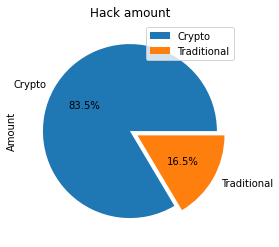

In [248]:
explode = (0,0.1)

Total_df.plot.pie(y='Amount',title="Hack amount", autopct = '%0.1f%%', explode = explode)

In [249]:
Hacker_ID_amount = Stolen_Funds_df['hackerid'].value_counts()

Hacker_ID_amount.hvplot.bar(
    ylabel='Amount of times Hacks',
    xlabel = 'Hacker ID',
    width = 600,
    label = 'Identity of Hackers')

:Bars   [index]   (hackerid)

In [250]:
Hacked_Locations_Traditional = Traditional_df['Location'].value_counts() 


Hacked_loc_Trad_bar = Hacked_Locations_Traditional.hvplot.bar(
    ylabel='Amount of times Hacked',
    xlabel = 'Location',
    width = 600,
    rot = 45)

Hacked_loc_Trad_bar



:Bars   [index]   (Location)

In [251]:
Hacked_Locations_Cryptocurrency = Cryptocurrency_df['Location'].value_counts()

Hacked_loc_Crypto_bar = Hacked_Locations_Cryptocurrency.hvplot.bar(
    ylabel='Amount of times Hacked',
    xlabel = 'Location',
    width = 500,
    rot = 45)

Hacked_loc_Crypto_bar

:Bars   [index]   (Location)

In [252]:
Hack_Methods_Traditional = Traditional_df['Method'].value_counts() 

Hack_Methods_Traditional

MalWare          11
External Hack     7
Phishing          5
Internal Hack     1
SIM Devices       1
Name: Method, dtype: int64

<AxesSubplot:ylabel='Method'>

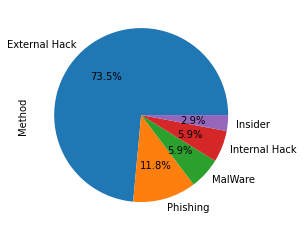

In [253]:
Hack_Methods_Crypto = Cryptocurrency_df['Method'].value_counts()



Hack_Methods_Crypto.plot.pie(autopct = '%0.1f%%')